<a href="https://colab.research.google.com/github/SergeiVorobev/CreateDailyCryptoPortfolio/blob/master/DailyPortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program attemps to optomize a user portfolio using the Efficient Frontier

In [2]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Get the crypto symbols/ tickers in the portfolio
# FAANG
assets = ['NEO-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'LINK-USD', 'BNB-USD', 'XLM-USD', 'EOS-USD', 'XMR-USD', 'TRX-USD']

# Assign weights to the crypto.
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Get the crupto/portfolio starting date
cryptoStartDate = '2017-10-01'

# Get the crypto ending date
today = datetime.today().strftime('%Y-%m-%d')

# Create a dataframe to store the adjusted close price of the crypto
df = pd.DataFrame()

# Store the adjusted close price of the crypto into the df
for crypto in assets:
  df[crypto] = web.DataReader(crypto, data_source='yahoo', start = cryptoStartDate, end = today)['Adj Close']

In [4]:
# Show the df
df

,NEO-USD,ETH-USD,XRP-USD,LTC-USD,LINK-USD,BNB-USD,XLM-USD,EOS-USD,XMR-USD,TRX-USD
Date,,,,,,,,,,
2017-09-30,35.720200,302.337006,0.206532,54.543301,0.436647,1.526530,0.013688,0.707760,93.222000,0.001848
2017-10-01,36.741001,297.475006,0.202676,53.375999,0.356767,1.964670,0.012962,0.654973,91.544197,0.002803
2017-10-02,33.606899,292.463013,0.203318,52.349602,0.345535,1.820700,0.012404,0.631230,92.961197,0.002447
2017-10-03,31.158199,292.657990,0.214774,51.399502,0.397361,1.601480,0.011851,0.601539,90.407097,0.003250
2017-10-04,32.275902,295.863007,0.237016,51.669498,0.406538,1.678490,0.014576,0.606157,91.858902,0.003320
...,...,...,...,...,...,...,...,...,...,...
2020-09-03,19.068296,388.241150,0.255883,50.611977,12.492867,21.056107,0.081452,3.014346,82.348129,0.035620
2020-09-04,16.918987,335.260071,0.237692,47.589340,10.611472,19.478767,0.075512,2.933592,77.705078,0.029997
2020-09-05,17.206112,353.362274,0.240731,48.053574,12.913730,23.190662,0.077862,2.912101,80.332649,0.031523


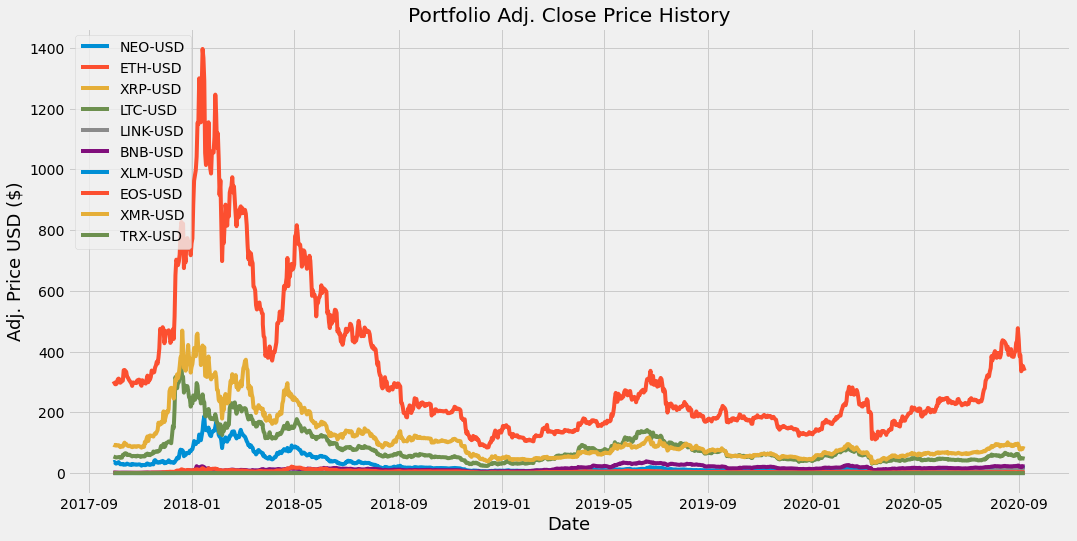

In [5]:
# Visually show the crypto/portfolio
title = 'Portfolio Adj. Close Price History'

# Get the crypto
my_crypto = df

# Create and plot the graph
plt.figure(figsize=(16,8))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()


In [6]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.4MB/s 


In [7]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [8]:
# Portfolio Optimization !

# Calculate the expected returns and the annualised sample covariance matrix of assets returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('NEO-USD', 0.0), ('ETH-USD', 0.0), ('XRP-USD', 0.0), ('LTC-USD', 0.0), ('LINK-USD', 0.42975), ('BNB-USD', 0.45138), ('XLM-USD', 0.0), ('EOS-USD', 0.0), ('XMR-USD', 0.0), ('TRX-USD', 0.11886)])
Expected annual return: 100.8%
Annual volatility: 92.9%
Sharpe Ratio: 1.06


(1.0081109430549402, 0.9285641576068054, 1.0641278095437208)

In [9]:
total_portfolio_value = int(input('Input Total value of your portfolio:\n'))
# Get the discrete allocation of each shape per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
# total_portfolio_value 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value )

allocation, leftover = da.lp_portfolio()
print('Descrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


Input Total value of your portfolio:
1000
Descrete allocation:  {'LINK-USD': 37, 'BNB-USD': 21, 'TRX-USD': 3321}
Funds remaining: $0.00


In [11]:
print('That is mean, that for ' + str(total_portfolio_value) + '$ '+ 'You should buy:\n\t')
for key in allocation:
  coin = ''
  for i in key:
    if i == '-':
      break
    coin += i
  print('\t' + str(allocation[key]) + ' ' + coin + ' monets\n\t')
print('\nThe result of this program is no financial advise!')


That is mean, that for 1000$ You should buy:
	
	37 LINK monets
	
	21 BNB monets
	
	3321 TRX monets
	

The result of this program is no financial advise!
